In [3]:
import pandas as pd
import genehearing.common.tools as tools
import matplotlib.pyplot as plt

In [4]:
%cd ..

/home/mwaligorska/Documents/GitHub/GeneHearing


In [12]:
config = tools.load_config()

In [7]:
#df = pd.read_csv("data/processed/audiometry_tonal_symmetry_v2.csv")
df = pd.read_csv(f"data/raw/{config['genetic_dataname']}.csv", sep=";")

In [15]:
df = pd.read_csv(f"data/raw/{config['genetic_dataname_all']}.csv", sep=";")

In [17]:
df.loc[df['Allele1_CNV'].notna() & df['Allele_1_hgvs_c'].isna(), 'Allele_1_hgvs_c'] = 'GJB6'
df.loc[df['Allele2_CNV2'].notna() & df['Allel_2_hgvs_c'].isna(), 'Allel_2_hgvs_c'] = 'GJB6'
df['Allele_1_hgvs_c'] = df['Allele_1_hgvs_c'].fillna('0').astype(str)
df['Allel_2_hgvs_c']  = df['Allel_2_hgvs_c'].fillna('0').astype(str)

pairs = df.apply(lambda x: tuple(sorted([x['Allele_1_hgvs_c'], x['Allel_2_hgvs_c']])), axis=1)

mytable = pairs.value_counts().reset_index(name='count')
mytable[['Allele_1_hgvs_c', 'Allele_2_hgvs_c']] = pd.DataFrame(mytable['index'].tolist(), index=mytable.index)
mytable = mytable.drop(columns='index')

print(mytable)
mytable.to_csv("pary_zliczone_1620.csv", sep=';')

    count           Allele_1_hgvs_c           Allele_2_hgvs_c
0     872       NM_004004.6:c.35del       NM_004004.6:c.35del
1     115      NM_004004.6:c.101T>C       NM_004004.6:c.35del
2     105    NM_004004.6:c.-23+1G>A       NM_004004.6:c.35del
3     105  NM_004004.6:c.313_326del       NM_004004.6:c.35del
4      91      NM_004004.6:c.269T>C       NM_004004.6:c.35del
..    ...                       ...                       ...
64      1      NM_004004.6:c.139G>T  NM_004004.6:c.313_326del
65      1       NM_004004.6:c.35del       NM_004004.6:c.71G>A
66      1                      GJB6  NM_004004.6:c.313_326del
67      1      NM_004004.6:c.269T>C      NM_004004.6:c.269T>C
68      1      NM_004004.6:c.167del      NM_004004.6:c.551G>C

[69 rows x 3 columns]


In [8]:
df.loc[df['Allele1_CNV'].notna() & df['Allele_1_hgvs_c'].isna(), 'Allele_1_hgvs_c'] = 'GJB6'
df.loc[df['Allele2_CNV2'].notna() & df['Allel_2_hgvs_c'].isna(), 'Allel_2_hgvs_c'] = 'GJB6'
df['Allele_1_hgvs_c'] = df['Allele_1_hgvs_c'].fillna('0').astype(str)
df['Allel_2_hgvs_c']  = df['Allel_2_hgvs_c'].fillna('0').astype(str)

pairs = df.apply(lambda x: tuple(sorted([x['Allele_1_hgvs_c'], x['Allel_2_hgvs_c']])), axis=1)

mytable = pairs.value_counts().reset_index(name='count')
mytable[['Allele_1_hgvs_c', 'Allele_2_hgvs_c']] = pd.DataFrame(mytable['index'].tolist(), index=mytable.index)
mytable = mytable.drop(columns='index')

print(mytable)
mytable.to_csv("results/pary_zliczone.csv", sep=';')

    count           Allele_1_hgvs_c           Allele_2_hgvs_c
0     765       NM_004004.6:c.35del       NM_004004.6:c.35del
1      84      NM_004004.6:c.101T>C       NM_004004.6:c.35del
2      79    NM_004004.6:c.-23+1G>A       NM_004004.6:c.35del
3      78  NM_004004.6:c.313_326del       NM_004004.6:c.35del
4      68      NM_004004.6:c.269T>C       NM_004004.6:c.35del
..    ...                       ...                       ...
61      1      NM_004004.6:c.139G>T  NM_004004.6:c.313_326del
62      1       NM_004004.6:c.35del       NM_004004.6:c.71G>A
63      1                      GJB6  NM_004004.6:c.313_326del
64      1      NM_004004.6:c.269T>C      NM_004004.6:c.269T>C
65      1      NM_004004.6:c.167del      NM_004004.6:c.551G>C

[66 rows x 3 columns]


In [9]:
#zliczanie ilości alleli
allele = pd.concat([df['Allele_1_hgvs_c'], df['Allel_2_hgvs_c']])
allele.value_counts().to_csv("results/allele_zliczone.csv", sep=';')

In [18]:
#zliczanie ilości alleli
allele = pd.concat([df['Allele_1_hgvs_c'], df['Allel_2_hgvs_c']])
allele.value_counts().to_csv("allele_zliczone_1620.csv", sep=';')

In [12]:
df = pd.read_csv(f"data/processed/audiometry_tonal_PTA_v3.csv", sep=",", encoding='cp1252')

In [13]:
df

,ID_PACJENTA,NUMER_HISTORII_CHOROBY,NUMER_W_JEDNOSTCE,DATA_BADANIA,DATA_OPISU,NAZWA_AUDIOMETRII,UWAGI_DO_AUDIOMETRII,TYP_AUDIOMETRII,WYNIK_X_125,WYNIK_X_250,...,WYNIK_X_3000_diff,WYNIK_X_4000_diff,WYNIK_X_6000_diff,WYNIK_X_8000_diff,SYMETRIA_1_DEF,SYMETRIA_2_DEF,SYMETRIA,PTA2,PTA4,hfPTA
0,115167,100156/2010,96226,2012-12-03 13:27:00,03.12.2012 13:27,AT Audiometria tonalna,Audiogram ucha lewego,Air,25.0,15.0,...,NaN,0.0,NaN,0.0,1,1,1,12.500000,15.625000,32.50
1,115167,100156/2010,96226,2012-12-03 13:27:00,03.12.2012 13:27,AT Audiometria tonalna,Audiogram ucha prawego,Air,20.0,10.0,...,NaN,0.0,NaN,0.0,1,1,1,12.500000,15.625000,32.50
2,115167,100156/2010,2583/13,2013-06-26 14:09:00,26.06.2013 14:09,AT Audiometria tonalna,Audiogram ucha lewego,Air,20.0,15.0,...,NaN,-5.0,NaN,-10.0,1,1,1,10.000000,14.375000,31.25
3,115167,100156/2010,2583/13,2013-06-26 14:09:00,26.06.2013 14:09,AT Audiometria tonalna,Audiogram ucha prawego,Air,20.0,15.0,...,NaN,-5.0,NaN,-10.0,1,1,1,10.000000,14.375000,31.25
4,115167,100156/2010,NaN,2014-07-29 11:43:00,29.07.2014 11:43,AT Audiometria tonalna,Audiogram ucha lewego,Air,15.0,15.0,...,NaN,-10.0,NaN,0.0,1,1,1,7.500000,10.625000,22.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17892,25668,9979/2010,06206/22,2022-07-30 12:33:00,30.07.2022 12:36,AT Audiometria tonalna,Audiogram ucha prawego,Air,NaN,NaN,...,NaN,NaN,NaN,NaN,1,brak_obl,1,108.333333,108.333333,NaN
17893,116465,99869/2010,02041/16,2016-02-29 11:27:00,29.02.2016 11:29,AT Audiometria tonalna,Audiogram ucha lewego,Air,NaN,105.0,...,NaN,NaN,NaN,NaN,brak_obl,brak_obl,brak_obl,110.000000,110.000000,NaN
17894,116465,99869/2010,02041/16,2016-02-29 11:27:00,29.02.2016 11:29,AT Audiometria tonalna,Audiogram ucha prawego,Air,NaN,NaN,...,NaN,NaN,NaN,NaN,brak_obl,brak_obl,brak_obl,115.000000,115.000000,NaN
17895,116465,99869/2010,315227,2021-08-11 11:03:00,11.08.2021 11:04,AT Audiometria tonalna,Audiogram ucha lewego,Air,NaN,100.0,...,NaN,NaN,NaN,NaN,brak_obl,brak_obl,brak_obl,112.500000,112.500000,NaN


In [4]:
df = pd.read_csv(f"data/processed/{config['tonaldataname']}.csv", sep=None, engine='python', dtype={'ID_PACJENTA': str}, encoding='cp1252')

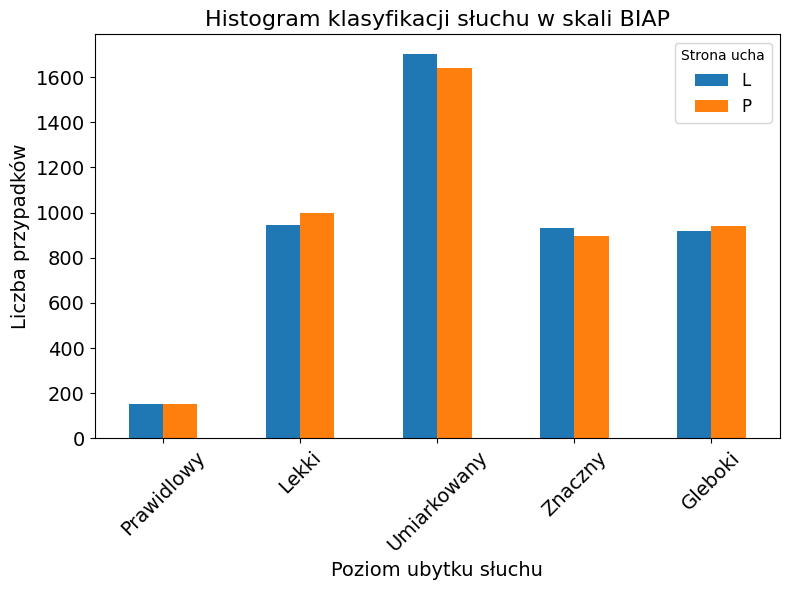

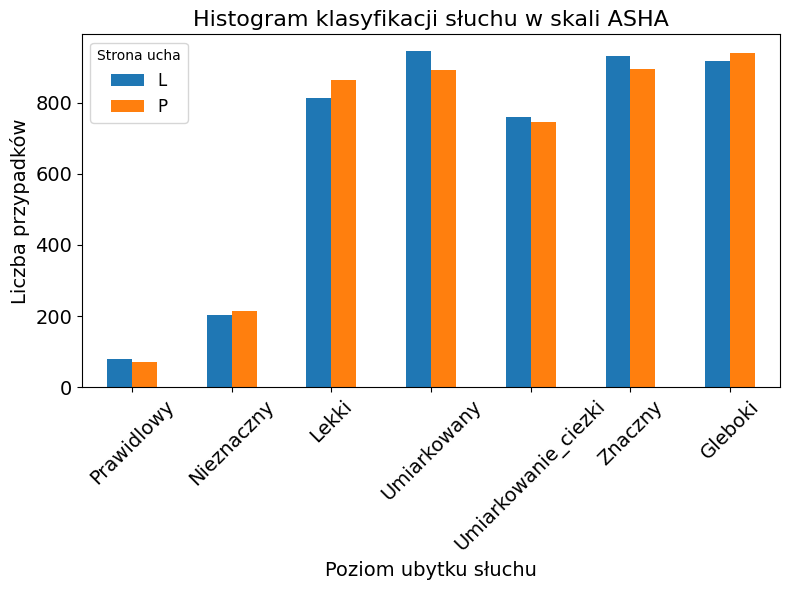

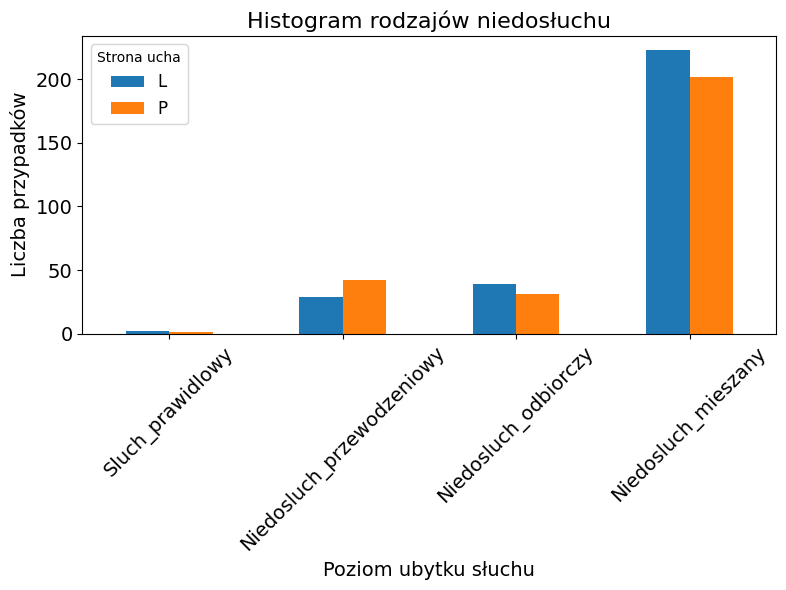

In [8]:
BIAP_label_map = {
    "Prawidlowy": 0,
    "Lekki": 1,
    "Umiarkowany": 2,
    "Znaczny": 3,
    "Gleboki": 4
}

ASHA_label_map = {
    "Prawidlowy": 0,
    "Nieznaczny": 1,
    "Lekki": 2,
    "Umiarkowany": 3,
    "Umiarkowanie_ciezki": 4,
    "Znaczny": 5,
    "Gleboki": 6
}

hearing_type_map ={
    "Sluch_prawidlowy":0,
    "Niedosluch_przewodzeniowy":1,
    "Niedosluch_odbiorczy":2,
    "Niedosluch_mieszany":3
}


df["BIAP_code"] = df["BIAP"].map(BIAP_label_map)
df["ASHA_code"] = df["ASHA"].map(ASHA_label_map)
df["hearing_type_code"] = df["hearing_type"].map(hearing_type_map)

counts = df.groupby(["BIAP_code", "ear_side"]).size().unstack(fill_value=0)
counts.plot(kind="bar", figsize=(8,6))
plt.xticks(range(5), BIAP_label_map.keys(), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Poziom ubytku słuchu", fontsize=14)
plt.ylabel("Liczba przypadków", fontsize=14)
plt.title("Histogram klasyfikacji słuchu w skali BIAP", fontsize=16)
plt.legend(title="Strona ucha", fontsize=12)
plt.tight_layout()
plt.show()


counts = df.groupby(["ASHA_code", "ear_side"]).size().unstack(fill_value=0)
counts.plot(kind="bar", figsize=(8,6))
plt.xticks(range(7), ASHA_label_map.keys(), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Poziom ubytku słuchu", fontsize=14)
plt.ylabel("Liczba przypadków", fontsize=14)
plt.title("Histogram klasyfikacji słuchu w skali ASHA", fontsize=16)
plt.legend(title="Strona ucha", fontsize=12)
plt.tight_layout()
plt.show()

counts = df.groupby(["hearing_type_code", "ear_side"]).size().unstack(fill_value=0)
counts.plot(kind="bar", figsize=(8,6))
plt.xticks(range(4), hearing_type_map.keys(), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Poziom ubytku słuchu", fontsize=14)
plt.ylabel("Liczba przypadków", fontsize=14)
plt.title("Histogram rodzajów niedosłuchu", fontsize=16)
plt.legend(title="Strona ucha", fontsize=12)
plt.tight_layout()
plt.show()